# Setting up the data for visualization

In [1]:
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Read data from table
# Dataset ("/kaggle/input/nuclear-explosions-data/nuclear_explosions.csv")
nukes = pd.read_csv("nuclear_explosions.csv")

In [3]:
nukes.columns

Index(['WEAPON SOURCE COUNTRY', 'WEAPON DEPLOYMENT LOCATION', 'Data.Source',
       'Location.Cordinates.Latitude', 'Location.Cordinates.Longitude',
       'Data.Magnitude.Body', 'Data.Magnitude.Surface',
       'Location.Cordinates.Depth', 'Data.Yeild.Lower', 'Data.Yeild.Upper',
       'Data.Purpose', 'Data.Name', 'Data.Type', 'Date.Day', 'Date.Month',
       'Date.Year'],
      dtype='object')

In [5]:
# Renaming columns
nukes.rename(columns = {"WEAPON SOURCE COUNTRY":"Source Country",
                        "WEAPON DEPLOYMENT LOCATION":"Deployment Location",
                       "Location.Cordinates.Latitude": "Latitude",
                       "Location.Cordinates.Longitude":"Longitude",
                       "Location.Cordinates.Depth":"Depth",
                       "Data.Source":"Source",
                       "Data.Magnitude.Body":"Body Wave Magnitude",
                       "Data.Magnitude.Surface":"Surface Wave Magnitude",
                       "Data.Yeild.Lower":"Explosion Yield L",
                       "Data.Yeild.Upper":"Explosion Yield U",
                       "Data.Purpose":"Detonation Reason",
                       "Data.Name":"Name",
                       "Data.Type":"Detonation Method",
                       "Date.Day":"Day",
                       "Date.Month":"Month",
                       "Date.Year":"Year"}, inplace=True)

In [6]:
nukes.columns

Index(['Source Country', 'Deployment Location', 'Source', 'Latitude',
       'Longitude', 'Body Wave Magnitude', 'Surface Wave Magnitude', 'Depth',
       'Explosion Yield L', 'Explosion Yield U', 'Detonation Reason', 'Name',
       'Detonation Method', 'Day', 'Month', 'Year'],
      dtype='object')

In [7]:
# Checking for null values in dataset
nukes.isna().sum()

Source Country            0
Deployment Location       0
Source                    0
Latitude                  0
Longitude                 0
Body Wave Magnitude       0
Surface Wave Magnitude    0
Depth                     0
Explosion Yield L         0
Explosion Yield U         0
Detonation Reason         0
Name                      0
Detonation Method         0
Day                       0
Month                     0
Year                      0
dtype: int64

In [8]:
# Remove missing value features having NaN, Na, Null
print("Missing values by features:")
for col in nukes.columns:
    num = 0 
    num = num + len(nukes[nukes[col] == "Nan"])
    num = num + len(nukes[nukes[col] == "Na"])
    num = num + len(nukes[nukes[col] == "Null"])
    print(f"{col}: {num} missing values\n")

Missing values by features:
Source Country: 0 missing values

Deployment Location: 0 missing values

Source: 0 missing values

Latitude: 0 missing values

Longitude: 0 missing values

Body Wave Magnitude: 0 missing values

Surface Wave Magnitude: 0 missing values

Depth: 0 missing values

Explosion Yield L: 0 missing values

Explosion Yield U: 0 missing values

Detonation Reason: 1 missing values

Name: 663 missing values

Detonation Method: 0 missing values

Day: 0 missing values

Month: 0 missing values

Year: 0 missing values



In [9]:
nukes["Name"] = nukes["Name"].apply(lambda x: "Unnamed" if x == "Nan" or x == "Null" or x == "Na" else x)

In [11]:
# Check for duplicates
duplicates = nukes[nukes.duplicated()]
print(duplicates)
print("\n\nNumber of Rows Duplicated", duplicates.shape)

     Source Country Deployment Location Source  Latitude  Longitude  \
352            USSR            Mtr Russ    MTM      48.0       46.0   
1599           USSR         Semi Kazakh    MTM      50.0       78.0   
1789           USSR           Perm Russ    NOA      61.0       58.0   

      Body Wave Magnitude  Surface Wave Magnitude  Depth  Explosion Yield L  \
352                   0.0                     0.0    0.0              1.200   
1599                  0.0                     0.0    0.0              0.001   
1789                  4.5                     0.0    0.0              3.200   

      Explosion Yield U Detonation Reason     Name Detonation Method  Day  \
352                 1.2                We  Unnamed             Space   27   
1599               20.0                Wr  Unnamed            Tunnel    5   
1789                3.2               Pne    Geliy             Shaft   28   

      Month  Year  
352      10  1961  
1599     12  1980  
1789      8  1984  


Number 

In [12]:
# remove duplicates
nukes = nukes.drop(nukes.index[[352, 1599, 1789]])

In [15]:
# Check again for duplicates
new_duplicates = nukes[nukes.duplicated()]
print("\n\nNumber of Duplicates:", new_duplicates.shape)



Number of Duplicates: (0, 16)


In [16]:
print("No more duplicates as the row dimension is a 0.")

No more duplicates as the row dimension is a 0.


In [17]:
# Unique values in each feature
for col in nukes.columns:
    distincts = len(nukes[col].unique())
    print(f"{col}: {distincts} Distinct Values\n") 

Source Country: 7 Distinct Values

Deployment Location: 79 Distinct Values

Source: 13 Distinct Values

Latitude: 525 Distinct Values

Longitude: 573 Distinct Values

Body Wave Magnitude: 43 Distinct Values

Surface Wave Magnitude: 26 Distinct Values

Depth: 137 Distinct Values

Explosion Yield L: 308 Distinct Values

Explosion Yield U: 310 Distinct Values

Detonation Reason: 28 Distinct Values

Name: 1306 Distinct Values

Detonation Method: 20 Distinct Values

Day: 31 Distinct Values

Month: 12 Distinct Values

Year: 50 Distinct Values



# Further analysis of the data

In [21]:
# Some rows from the dataset
nukes.head()

,Source Country,Deployment Location,Source,Latitude,Longitude,Body Wave Magnitude,Surface Wave Magnitude,Depth,Explosion Yield L,Explosion Yield U,Detonation Reason,Name,Detonation Method,Day,Month,Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946


In [22]:
# Stastistical data
nukes.describe()

,Latitude,Longitude,Body Wave Magnitude,Surface Wave Magnitude,Depth,Explosion Yield L,Explosion Yield U,Day,Month,Year
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,35.436676,-36.157007,2.146353,0.357220,-0.491550,208.748460,323.894013,16.678904,7.278512,1970.890357
std,23.359139,100.833954,2.626006,1.204375,10.989119,1643.149463,2056.676627,8.796017,3.132288,10.372056
min,-49.500000,-169.320000,0.000000,0.000000,-400.000000,0.000000,0.000000,1.000000,1.000000,1945.000000
25%,37.000000,-116.052500,0.000000,0.000000,0.000000,0.000000,19.000000,9.000000,5.000000,1962.000000
50%,37.100000,-116.000000,0.000000,0.000000,0.000000,0.001000,20.000000,17.000000,8.000000,1970.000000
75%,49.870000,78.000000,5.100000,0.000000,0.000000,20.000000,150.000000,24.500000,10.000000,1979.000000
max,75.100000,179.220000,7.400000,6.000000,1.451000,50000.000000,50000.000000,31.000000,12.000000,1998.000000


In [23]:
# Datatype of each feature
print(nukes.dtypes)

Source Country             object
Deployment Location        object
Source                     object
Latitude                  float64
Longitude                 float64
Body Wave Magnitude       float64
Surface Wave Magnitude    float64
Depth                     float64
Explosion Yield L         float64
Explosion Yield U         float64
Detonation Reason          object
Name                       object
Detonation Method          object
Day                         int64
Month                       int64
Year                        int64
dtype: object


In [24]:
# In data we have lower bound and upper bound of yield
# Feature engineering : Take average explosion yield
nukes["Explosion Yield Average"] = (nukes["Explosion Yield L"] + nukes["Explosion Yield U"]) / 2

In [26]:
nukes["Explosion Yield Average"].head()

0    21.0
1    15.0
2    21.0
3    21.0
4    21.0
Name: Explosion Yield Average, dtype: float64

In [27]:
# Check whether new feature would be useeful or not
# Check to get the exact number of instances where the upper yield is not equal to the lower yield
wanted_cols = ["Explosion Yield U", "Explosion Yield L", "Explosion Yield Average"]
unwanted_cols = [col for col in nukes.columns if col not in wanted_cols]
yields = nukes.drop(unwanted_cols, axis="columns")
yields.head()

,Explosion Yield L,Explosion Yield U,Explosion Yield Average
0,21.0,21.0,21.0
1,15.0,15.0,15.0
2,21.0,21.0,21.0
3,21.0,21.0,21.0
4,21.0,21.0,21.0


In [28]:
yields.tail()

,Explosion Yield L,Explosion Yield U,Explosion Yield Average
2041,3.0,12.0,7.5
2042,0.0,20.0,10.0
2043,0.0,1.0,0.5
2044,0.0,35.0,17.5
2045,0.0,18.0,9.0


In [29]:
# Here, the tail columns does not have same upper and lower yield. Hence, new feature is useful

# Plot Relationships

Text(0, 0.5, 'Average Explosion Yield (Killotons of TNT)')

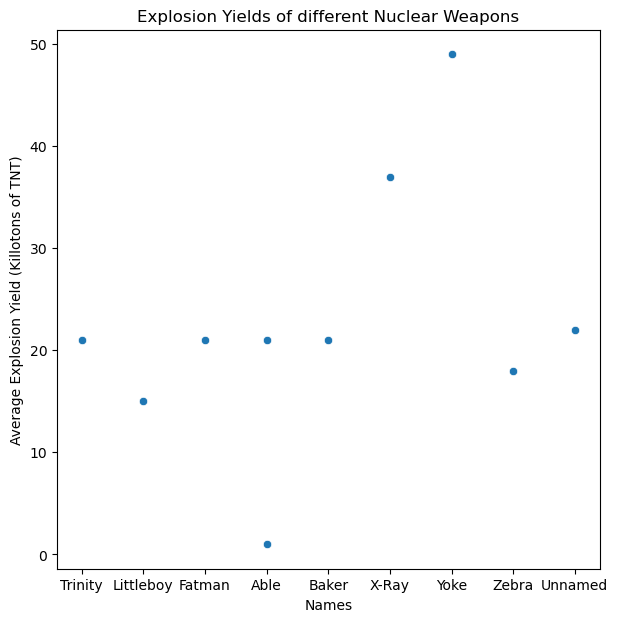

In [35]:
# Some explosion yields (first 10)
plt.figure(figsize=(7,7))
sns.scatterplot(x = nukes["Name"][:10], y = nukes["Explosion Yield Average"][:10])
plt.title("Explosion Yields of different Nuclear Weapons")
plt.xlabel("Names")
plt.ylabel("Average Explosion Yield (Killotons of TNT)")


Text(0.5, 0, 'Names')

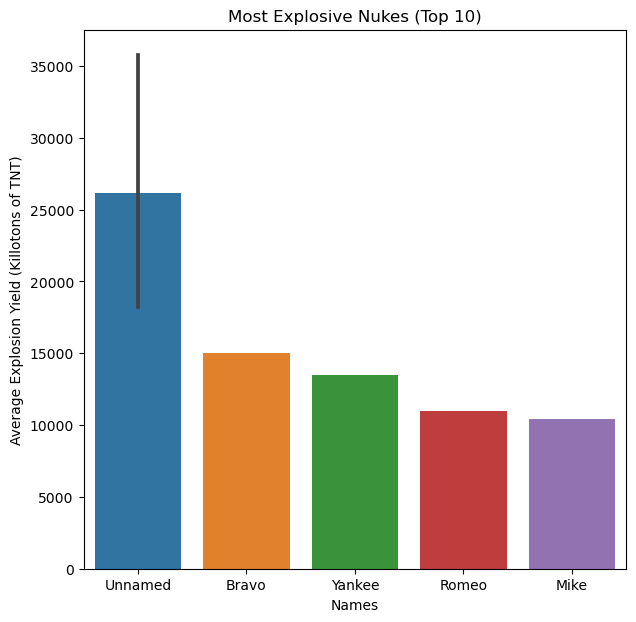

In [46]:
# Nukes with the biggest explosions (i.e. yiels)
nukes_by_top_explosions = nukes.sort_values(by="Explosion Yield Average", ascending=False)

plt.figure(figsize=(7,7))
sns.barplot(x=nukes_by_top_explosions["Name"][:10], y=nukes_by_top_explosions["Explosion Yield Average"][:10])
plt.title("Most Explosive Nukes (Top 10)")
plt.ylabel("Average Explosion Yield (Killotons of TNT)")
plt.xlabel("Names")

# plt.show()

Text(0.5, 0, 'Names')

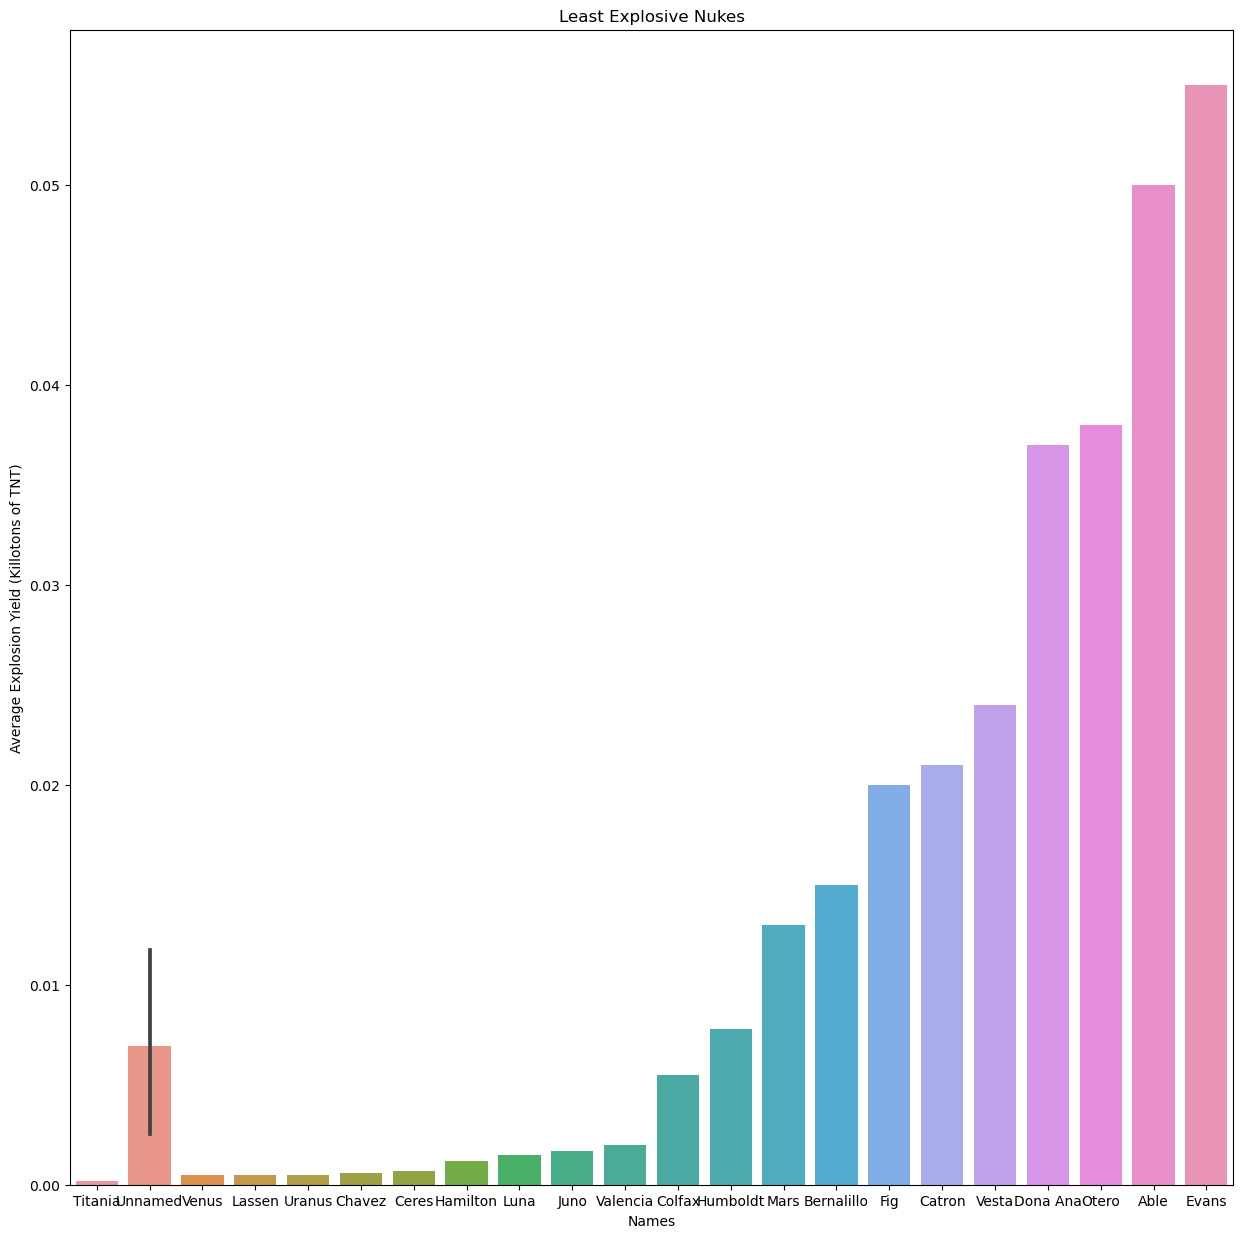

In [47]:
# Nukes with the smallest explosions (i.e. yiels)
nukes_by_least_explosions = nukes.sort_values(by="Explosion Yield Average", ascending=True)
zero_explosions = nukes_by_least_explosions[nukes_by_least_explosions["Explosion Yield Average"]==0]
nukes_by_least_explosions = nukes_by_least_explosions.drop(zero_explosions.index)

plt.figure(figsize=(15,15))
sns.barplot(x=nukes_by_least_explosions["Name"][:50], y=nukes_by_least_explosions["Explosion Yield Average"][:50])
plt.title("Least Explosive Nukes")
plt.ylabel("Average Explosion Yield (Killotons of TNT)")
plt.xlabel("Names")

In [48]:
nukes_by_least_explosions["Explosion Yield Average"][:50]

296     0.0002
1555    0.0005
68      0.0005
1010    0.0005
186     0.0005
1444    0.0005
1447    0.0005
1133    0.0005
884     0.0005
1227    0.0005
544     0.0005
1207    0.0005
141     0.0005
273     0.0005
1504    0.0005
1507    0.0005
362     0.0005
1610    0.0005
1619    0.0005
1512    0.0005
524     0.0005
1640    0.0005
193     0.0005
1706    0.0005
528     0.0005
290     0.0006
287     0.0007
266     0.0012
244     0.0015
284     0.0017
247     0.0020
324     0.0040
257     0.0055
545     0.0070
292     0.0078
1414    0.0100
248     0.0130
242     0.0150
234     0.0200
283     0.0210
269     0.0240
546     0.0280
64      0.0300
326     0.0300
529     0.0310
268     0.0370
241     0.0380
286     0.0500
20      0.0500
291     0.0550
Name: Explosion Yield Average, dtype: float64

# which contry contributed the most to this dataset

In [49]:
print(nukes["Source"].unique())

['DOE' 'MTM' 'UGS' 'ISC' 'DIS' 'SPA' 'ZAR' 'WTN' 'HFS' 'MTU' 'NRD' 'BKY'
 'NOA']


In [50]:
# Country of origin
countries = {"DOE":"United States", "MTM":"Russia", "ISC":"UK", "UGS":"United States", "DIS":"Netherlands", "SPA":"France", 
            "ZAR":"Sweden", "WTN":"New Zealand", "HFS":"Sweden", "MTU":"United States", "NRD":"United States", "BKY":"United States", 
             "NOA":"Norway"}

In [52]:
# New country sourse feature:
nukes["Country Source"] = nukes["Source"].apply(lambda x: countries[x] if x in countries else x)

In [53]:
nukes.head()

,Source Country,Deployment Location,Source,Latitude,Longitude,Body Wave Magnitude,Surface Wave Magnitude,Depth,Explosion Yield L,Explosion Yield U,Detonation Reason,Name,Detonation Method,Day,Month,Year,Explosion Yield Average,Country Source
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945,21.0,United States
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945,15.0,United States
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945,21.0,United States
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946,21.0,United States
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946,21.0,United States


In [54]:
nukes.tail()

,Source Country,Deployment Location,Source,Latitude,Longitude,Body Wave Magnitude,Surface Wave Magnitude,Depth,Explosion Yield L,Explosion Yield U,Detonation Reason,Name,Detonation Method,Day,Month,Year,Explosion Yield Average,Country Source
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.0,3.0,12.0,Wr,Unnamed,Ug,29,7,1996,7.5,Sweden
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.0,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998,10.0,Sweden
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.0,0.0,1.0,Wr,Unnamed,Ug,13,5,1998,0.5,United States
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.0,0.0,35.0,Wr,Unnamed,Ug,28,5,1998,17.5,Sweden
2045,PAKIST,Kharan,HFS,28.49,63.78,5.0,0.0,0.0,0.0,18.0,Wr,Unnamed,Ug,30,5,1998,9.0,Sweden


In [55]:
# The number of different countries in the dataset
print("Number of Countries: ", len(nukes["Country Source"].unique()))

Number of Countries:  8


In [56]:
# Initialise array to hold the amounts
i = 0
country_sums = [0,0,0,0,0,0,0,0]

# Loops through each country and adds the amount to the array
for country in nukes["Country Source"].unique():
    num = len(nukes[nukes["Country Source"] == country])
    country_sums[i] = num
    i+=1

In [57]:
print(nukes["Country Source"].unique())
print("Country Sums: ", country_sums)

['United States' 'Russia' 'UK' 'Netherlands' 'France' 'Sweden'
 'New Zealand' 'Norway']
Country Sums:  [1073, 167, 545, 19, 23, 114, 93, 9]


In [58]:
country_contribution = pd.Series(country_sums, index=["United States", "Russia", "UK", "Netherlands", "France", "Sweden", "New Zealand", "Norway"])
print(country_contribution)

United States    1073
Russia            167
UK                545
Netherlands        19
France             23
Sweden            114
New Zealand        93
Norway              9
dtype: int64


Text(0.5, 0, 'Countries')

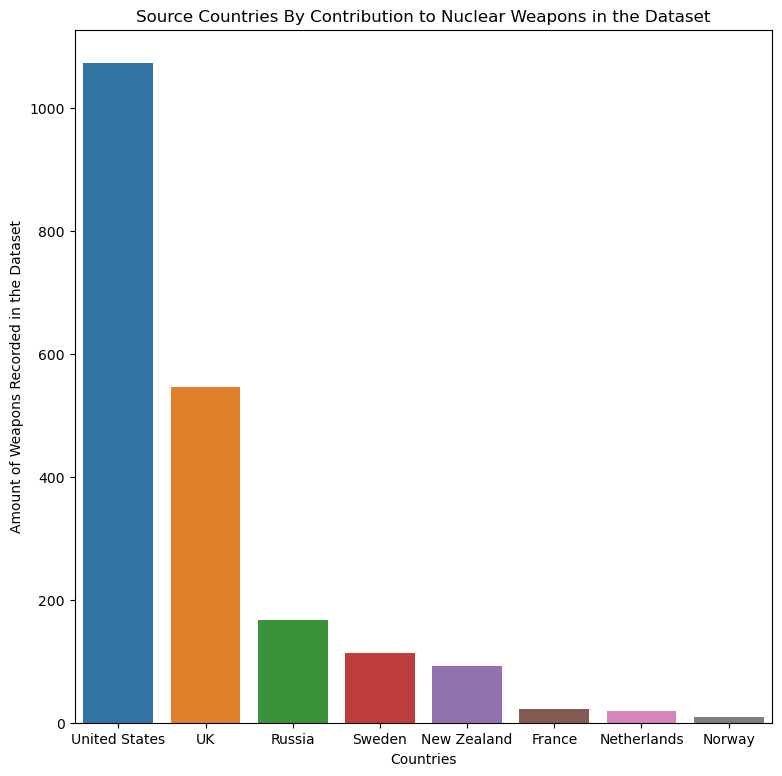

In [63]:
country_contribution = country_contribution.sort_values(ascending=False)
plt.figure(figsize=(9,9))
sns.barplot(x=country_contribution.index, y=country_contribution)
plt.title("Source Countries By Contribution to Nuclear Weapons in the Dataset")
plt.ylabel("Amount of Weapons Recorded in the Dataset")
plt.xlabel("Countries")